# **The Behavioral Risk Factor Data on Tobacco Use**

The Behavioral Risk Factor Data on Tobacco Use (2010 and Prior), provided by the Centers for Disease Control and Prevention (CDC), offers insights into tobacco use patterns in the U.S. from data collected through the State Tobacco Activities Tracking and Evaluation (STATE) System and the Behavioral Risk Factor Surveillance System (BRFSS) surveys, spanning from 1996 to 2010.

The BRFSS is a state-based, continuous surveillance system that gathers data on modifiable risk factors for chronic diseases and other major causes of death. The data from the STATE System, which was derived from the BRFSS surveys, focuses on key tobacco-related topics, such as:

* Cigarette smoking status (whether individuals currently smoke, have smoked, or have never smoked).
* Cigarette smoking prevalence across different demographic groups (age, gender, race/ethnicity, etc.).
* The frequency of cigarette smoking among those who smoke.
* The frequency and success of quit attempts by smokers.


Importantly, this data should not be compared to BRFSS data collected from 2011 onward, as the survey methodologies were altered after that year.

Source Attribution: Centers for Disease Control and Prevention, Data.gov.

**1. Import all the important libraries.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**2. Upload the data set under the variable 'tobdata'**

In [2]:
tobdata= pd.read_csv("Tobacco use -1969-2010.csv")

**3. Display the dataset**

In [3]:
print(tobdata)

       YEAR LocationAbbr LocationDesc                       TopicDesc  \
0      2010           AL      Alabama              Cessation (Adults)   
1      2010           AL      Alabama          Cigarette Use (Adults)   
2      2010           AL      Alabama          Cigarette Use (Adults)   
3      2010           AL      Alabama          Cigarette Use (Adults)   
4      2010           AL      Alabama          Cigarette Use (Adults)   
...     ...          ...          ...                             ...   
38045  1996           WY      Wyoming  Cigarette Consumption (Adults)   
38046  1996           WY      Wyoming  Cigarette Consumption (Adults)   
38047  1996           WY      Wyoming  Cigarette Consumption (Adults)   
38048  1996           WY      Wyoming  Cigarette Consumption (Adults)   
38049  1996           WY      Wyoming              Cessation (Adults)   

              MeasureDesc  Data_Value(%)  Sample_Size  Gender       Race  \
0            Quit Smoking           53.3       

In [4]:
tobdata.head()

,YEAR,LocationAbbr,LocationDesc,TopicDesc,MeasureDesc,Data_Value(%),Sample_Size,Gender,Race,Age,Education,DataSource
0,2010,AL,Alabama,Cessation (Adults),Quit Smoking,53.3,659.0,Female,All Races,All Ages,All Grades,BRFSS
1,2010,AL,Alabama,Cigarette Use (Adults),Occasional smoker,18.7,5234.0,Female,All Races,All Ages,All Grades,BRFSS
2,2010,AL,Alabama,Cigarette Use (Adults),Occasional smoker,18.6,1197.0,Female,All Races,18 to 44 Years,All Grades,BRFSS
3,2010,AL,Alabama,Cigarette Use (Adults),Occasional smoker,21.5,5349.0,Female,White,All Ages,All Grades,BRFSS
4,2010,AL,Alabama,Cigarette Use (Adults),Occasional smoker,21.8,104.0,Female,Hispanic,All Ages,All Grades,BRFSS


In [5]:
tobdata.tail()

,YEAR,LocationAbbr,LocationDesc,TopicDesc,MeasureDesc,Data_Value(%),Sample_Size,Gender,Race,Age,Education,DataSource
38045,1996,WY,Wyoming,Cigarette Consumption (Adults),Smoking addict,54.0,207.0,Male,All Races,All Ages,All Grades,BRFSS
38046,1996,WY,Wyoming,Cigarette Consumption (Adults),Smoking addict,28.2,207.0,Male,All Races,All Ages,All Grades,BRFSS
38047,1996,WY,Wyoming,Cigarette Consumption (Adults),Smoking addict,20.8,516.0,Male,All Races,All Ages,All Grades,BRFSS
38048,1996,WY,Wyoming,Cigarette Consumption (Adults),Smoking addict,13.9,309.0,Female,All Races,All Ages,All Grades,BRFSS
38049,1996,WY,Wyoming,Cessation (Adults),Quit Smoking,55.4,579.0,Male,All Races,All Ages,All Grades,BRFSS


In [6]:
###to check the size of the dataset
print(tobdata.shape)

(38050, 12)


**3. Data Cleaning**

*Using info() code to get a comprehensive overview of the dataset, this included columns, data type, null value and dimensions as viewed below.*

In [7]:
tobdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38050 entries, 0 to 38049
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YEAR           38050 non-null  int64  
 1   LocationAbbr   38050 non-null  object 
 2   LocationDesc   38050 non-null  object 
 3   TopicDesc      38050 non-null  object 
 4   MeasureDesc    38050 non-null  object 
 5   Data_Value(%)  36091 non-null  float64
 6   Sample_Size    36041 non-null  float64
 7   Gender         38050 non-null  object 
 8   Race           38050 non-null  object 
 9   Age            38050 non-null  object 
 10  Education      38050 non-null  object 
 11  DataSource     38050 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 3.5+ MB


In [8]:
### To create the copy of dataset for further cleaning and updation
Ctobdata = tobdata.copy()

*Identifying the duplicate values and handling those values by dropping them.*

In [9]:
### To check the number of duplicate values
Dup = Ctobdata.duplicated().sum()
if Dup >0:
    print("There is",Dup,"Duplicate value")
else:
    print("No Duplicate value")

There is 3053 Duplicate value


In [10]:
### Removing Duplicate values
Ctobdata=Ctobdata.drop_duplicates()
Dup = Ctobdata.duplicated().sum()
print("After treating duplicates, there are",Dup,"duplicate values")

After treating duplicates, there are 0 duplicate values


*Identifying the null values and imputing the null values using mean.*

In [11]:
###To check the number of null values and fill the null values
Null_value=Ctobdata.isnull().sum()
print("There are",Null_value,"Null Values")
Null_mean=Ctobdata.isnull().mean() * 100
Null_mean

There are YEAR                0
LocationAbbr        0
LocationDesc        0
TopicDesc           0
MeasureDesc         0
Data_Value(%)    1311
Sample_Size      1361
Gender              0
Race                0
Age                 0
Education           0
DataSource          0
dtype: int64 Null Values


YEAR             0.000000
LocationAbbr     0.000000
LocationDesc     0.000000
TopicDesc        0.000000
MeasureDesc      0.000000
Data_Value(%)    3.746035
Sample_Size      3.888905
Gender           0.000000
Race             0.000000
Age              0.000000
Education        0.000000
DataSource       0.000000
dtype: float64

In [12]:
tob_filled = Ctobdata.fillna(0)
Ctobdata['Data_Value(%)'].fillna(Ctobdata['Data_Value(%)'].mean(),inplace=True)
Ctobdata['Sample_Size'].fillna(Ctobdata['Sample_Size'].mean(),inplace=True)


C:\Users\Dell\AppData\Local\Temp\ipykernel_2500\1113718492.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Ctobdata['Data_Value(%)'].fillna(Ctobdata['Data_Value(%)'].mean(),inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_2500\1113718492.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [13]:
###Null value check after imputing and treating the null value
Ctobdata.isnull().sum()

YEAR             0
LocationAbbr     0
LocationDesc     0
TopicDesc        0
MeasureDesc      0
Data_Value(%)    0
Sample_Size      0
Gender           0
Race             0
Age              0
Education        0
DataSource       0
dtype: int64

*Checking for Garbage Values and Their Frequency*

In [14]:
###check garbage values (unique value and its frequency)
for column in Ctobdata.select_dtypes(include="object").columns:
    print(f"{Ctobdata[column].value_counts()}\n")

LocationAbbr
CA    675
WA    675
MN    674
NV    674
TX    673
AK    673
MI    673
OK    672
FL    672
OR    671
AZ    671
MA    671
NY    671
NM    670
NJ    670
NC    670
MD    670
PA    668
RI    668
VA    668
KS    668
IN    668
WI    667
CO    666
CT    666
MO    666
LA    664
GA    664
NE    664
OH    663
SC    663
DE    663
IL    663
AR    659
ID    658
UT    658
AL    655
IA    654
DC    653
KY    651
MS    650
MT    649
NH    649
SD    647
VT    647
HI    647
WY    646
TN    645
WV    644
ND    640
ME    638
PR    555
VI    369
GU    259
US     50
Name: count, dtype: int64

LocationDesc
California                         675
Washington                         675
Minnesota                          674
Nevada                             674
Texas                              673
Alaska                             673
Michigan                           673
Oklahoma                           672
Florida                            672
Oregon                             671
Arizona

In [15]:
### Cleaned dataset displayed
Ctobdata

,YEAR,LocationAbbr,LocationDesc,TopicDesc,MeasureDesc,Data_Value(%),Sample_Size,Gender,Race,Age,Education,DataSource
0,2010,AL,Alabama,Cessation (Adults),Quit Smoking,53.3,659.0,Female,All Races,All Ages,All Grades,BRFSS
1,2010,AL,Alabama,Cigarette Use (Adults),Occasional smoker,18.7,5234.0,Female,All Races,All Ages,All Grades,BRFSS
2,2010,AL,Alabama,Cigarette Use (Adults),Occasional smoker,18.6,1197.0,Female,All Races,18 to 44 Years,All Grades,BRFSS
3,2010,AL,Alabama,Cigarette Use (Adults),Occasional smoker,21.5,5349.0,Female,White,All Ages,All Grades,BRFSS
4,2010,AL,Alabama,Cigarette Use (Adults),Occasional smoker,21.8,104.0,Female,Hispanic,All Ages,All Grades,BRFSS
...,...,...,...,...,...,...,...,...,...,...,...,...
38045,1996,WY,Wyoming,Cigarette Consumption (Adults),Smoking addict,54.0,207.0,Male,All Races,All Ages,All Grades,BRFSS
38046,1996,WY,Wyoming,Cigarette Consumption (Adults),Smoking addict,28.2,207.0,Male,All Races,All Ages,All Grades,BRFSS
38047,1996,WY,Wyoming,Cigarette Consumption (Adults),Smoking addict,20.8,516.0,Male,All Races,All Ages,All Grades,BRFSS
38048,1996,WY,Wyoming,Cigarette Consumption (Adults),Smoking addict,13.9,309.0,Female,All Races,All Ages,All Grades,BRFSS


In [16]:
###To check the null value, datatype, number of columns and number of rows of the cleaned dataset.
Ctobdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34997 entries, 0 to 38049
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YEAR           34997 non-null  int64  
 1   LocationAbbr   34997 non-null  object 
 2   LocationDesc   34997 non-null  object 
 3   TopicDesc      34997 non-null  object 
 4   MeasureDesc    34997 non-null  object 
 5   Data_Value(%)  34997 non-null  float64
 6   Sample_Size    34997 non-null  float64
 7   Gender         34997 non-null  object 
 8   Race           34997 non-null  object 
 9   Age            34997 non-null  object 
 10  Education      34997 non-null  object 
 11  DataSource     34997 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 3.5+ MB


**4. Exploratory Data Analysis(EDA)**

*Performing the statistical analysis*

In [17]:
Ctobdata.describe(include='number').round(2).style.background_gradient()

,YEAR,Data_Value(%),Sample_Size
count,34997.000000,34997.000000,34997.000000
mean,2002.760000,33.180000,1764.450000
std,4.360000,18.140000,2460.490000
min,1996.000000,0.000000,50.000000
25%,1999.000000,20.300000,391.000000
50%,2003.000000,26.900000,988.000000
75%,2007.000000,46.500000,2076.000000
max,2010.000000,95.200000,42835.000000


*Pichart plotted for every Object valued columns to see distrubution of data*

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

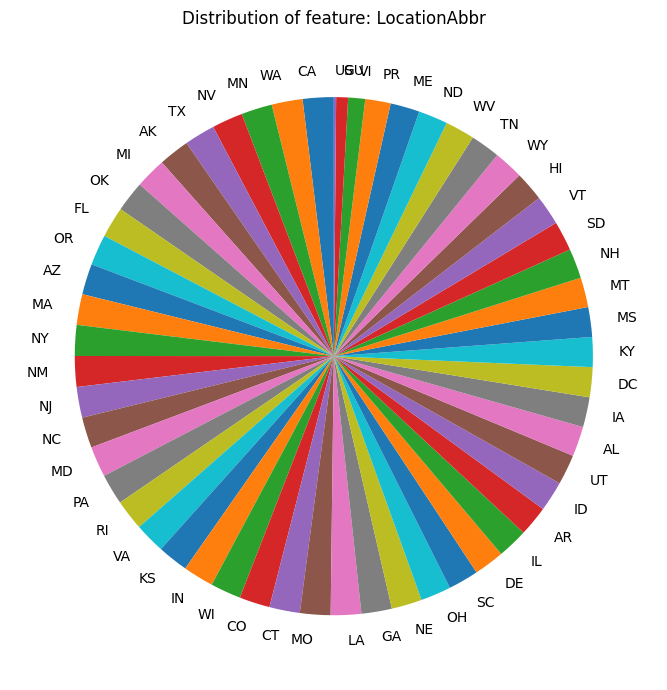

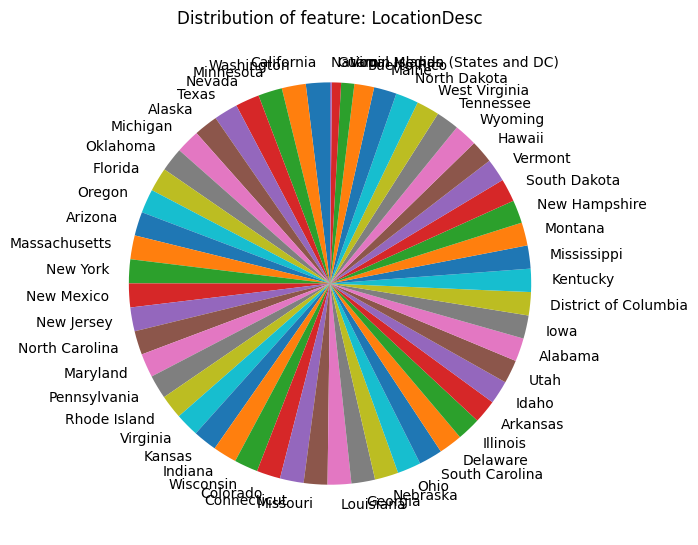

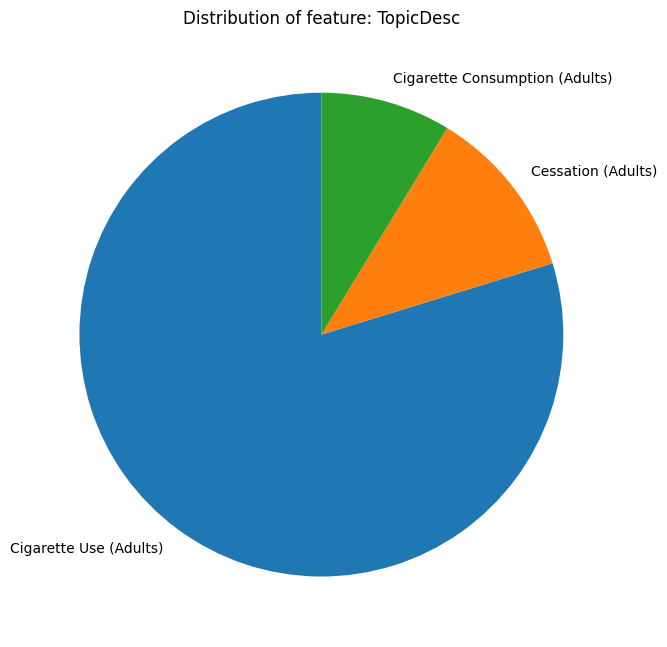

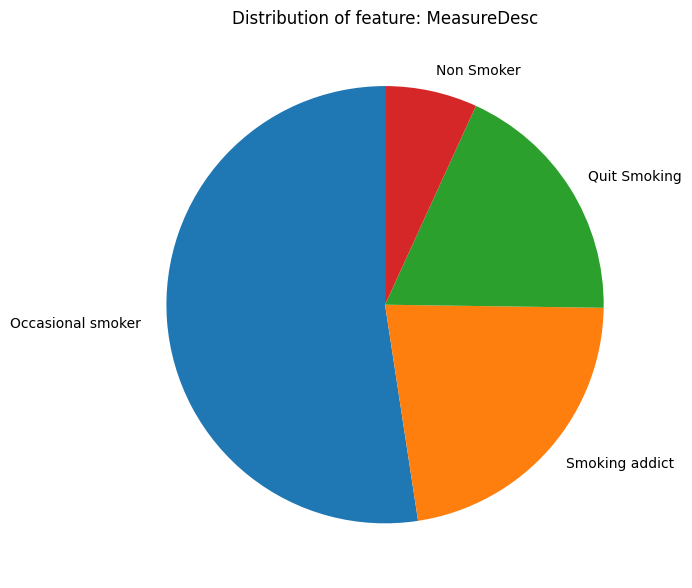

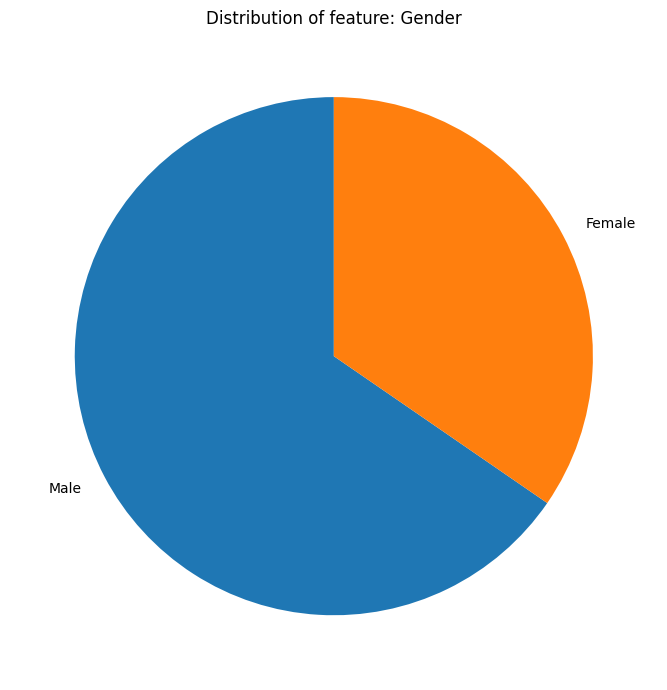

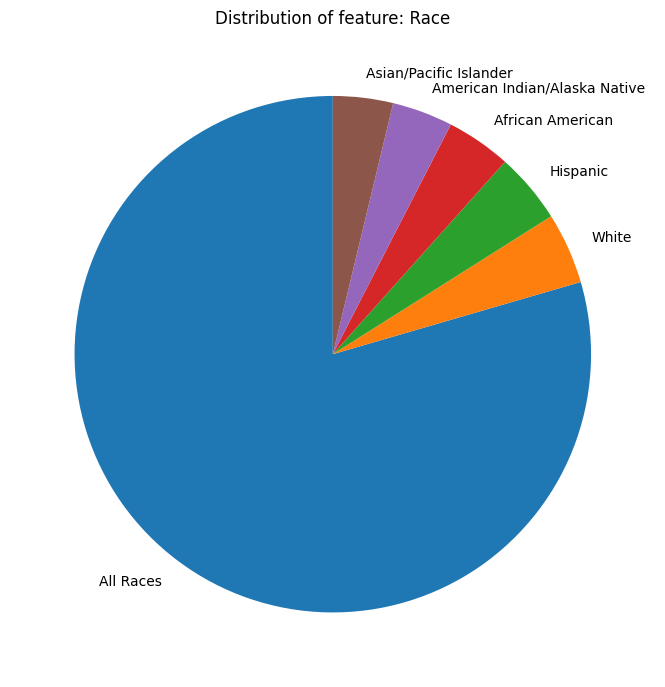

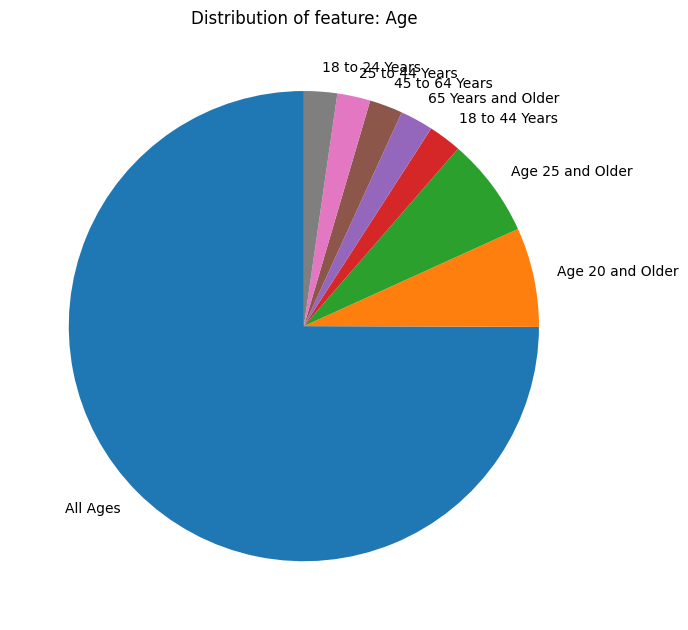

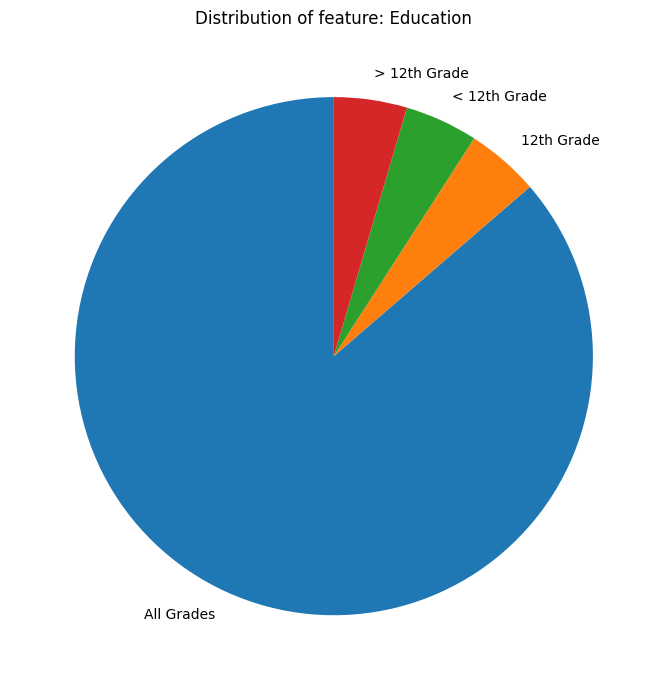

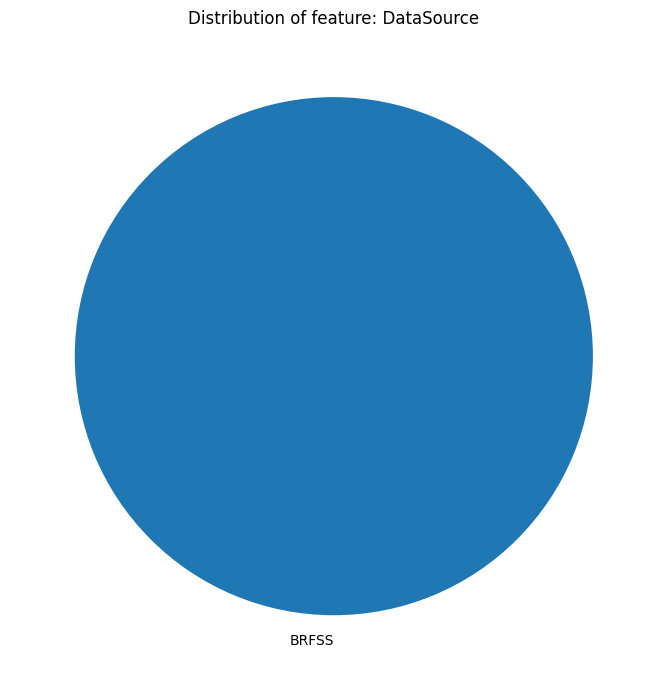

In [19]:
# Loop through all columns in the DataFrame
for column in Ctobdata.columns:
    # Check if the column is categorical (object type or categorical dtype)
    if Ctobdata[column].dtype == 'object' or Ctobdata[column].dtype.name == 'category':
        # Count the occurrences of each category in the column
        category_counts = Ctobdata[column].value_counts()

        # Create a pie chart
        plt.figure(figsize=(7, 7))
        plt.pie(category_counts, labels=category_counts.index, startangle=90)

        # Add a title
        plt.title(f'Distribution of feature: {column}')

        # Display the pie chart
        plt.tight_layout()
        plt.show()
        print("\n")

*Ploting the numerical value in hisplot*

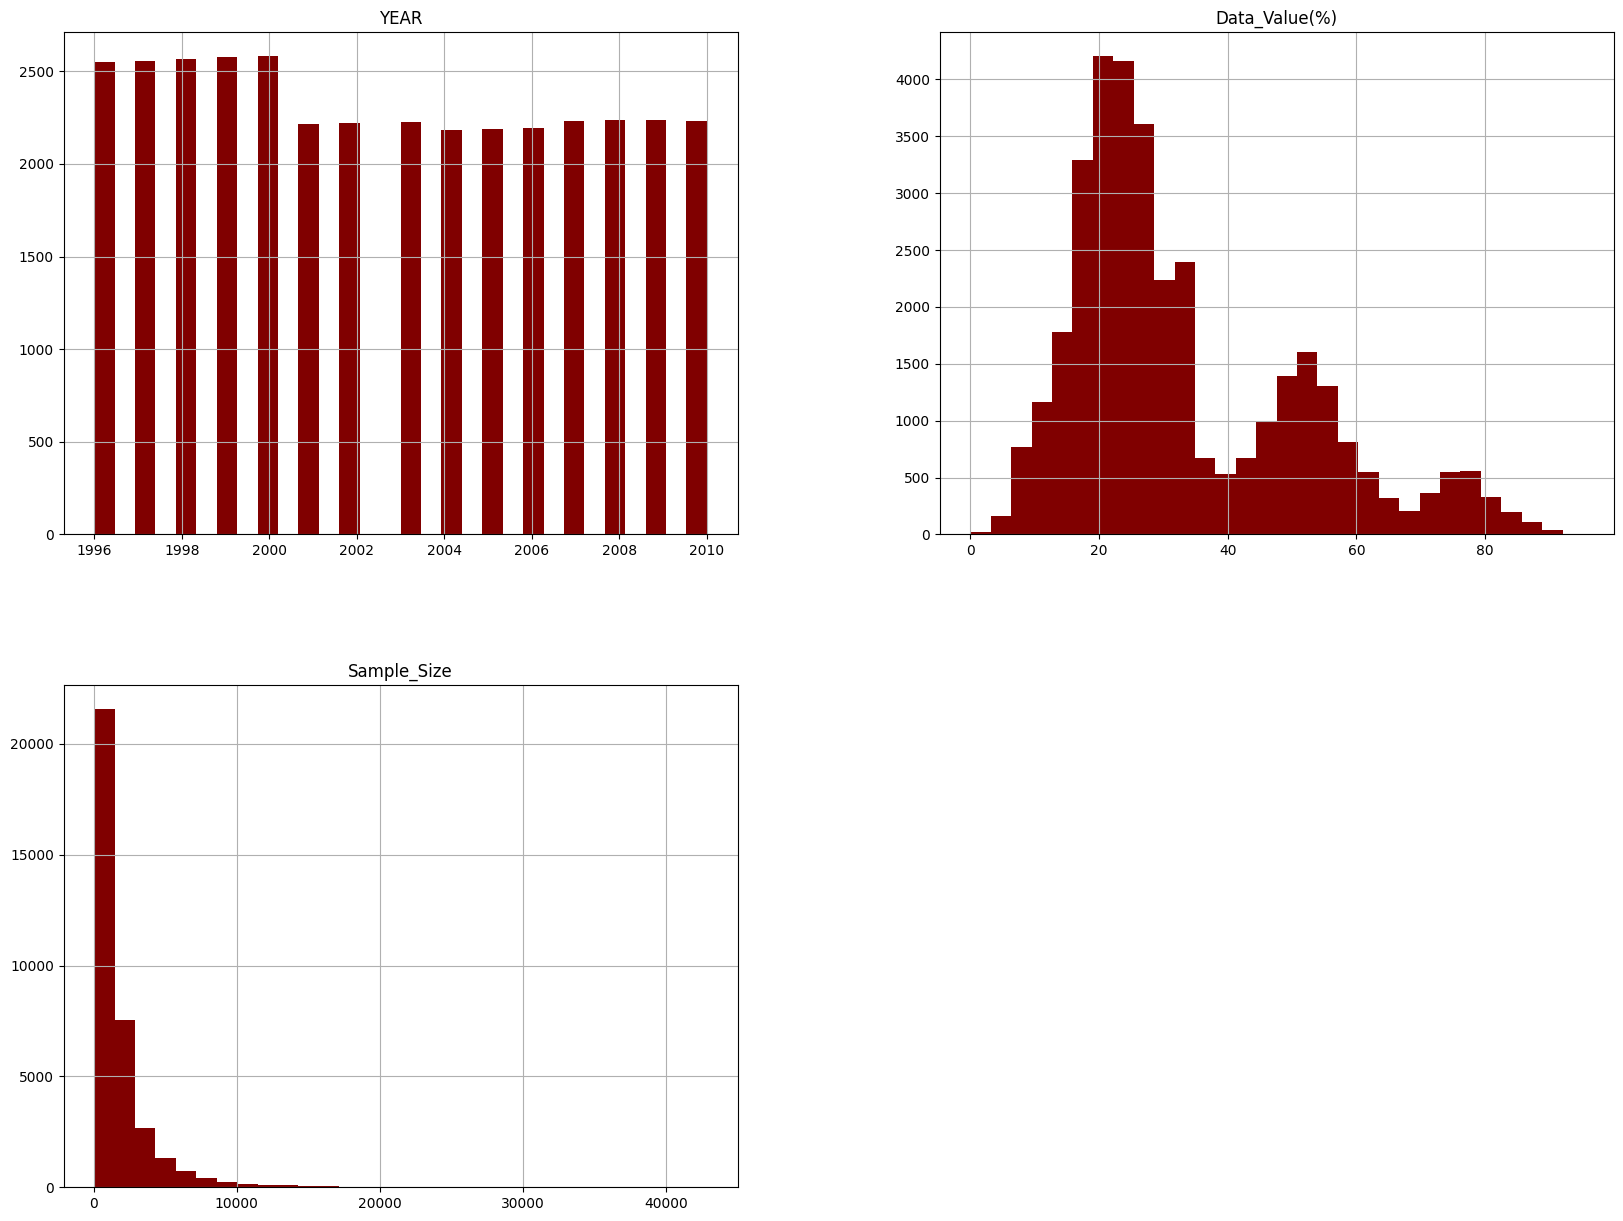

In [20]:
Ctobdata.hist(bins=30, figsize=(20, 15),color='maroon')
plt.show()

Skewness Treatment

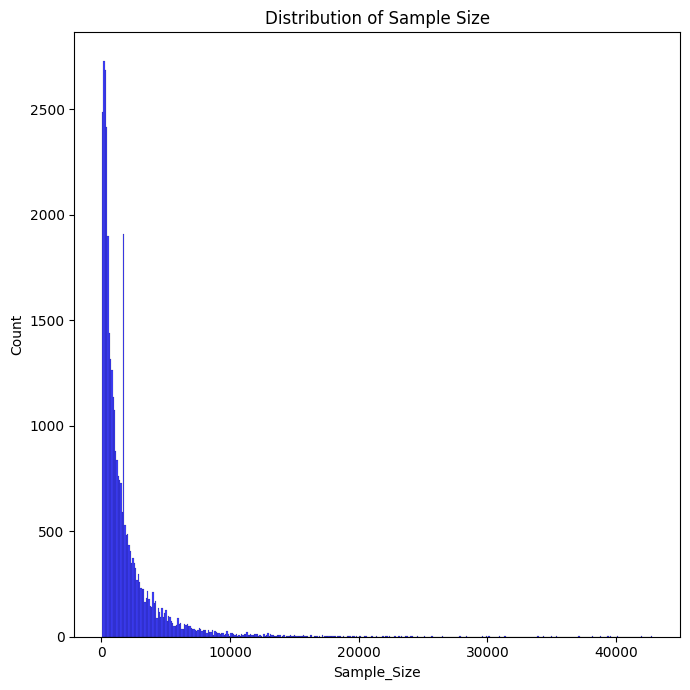

In [21]:
##Plotting the graph before Sknewness treatment.
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram for the 'Sample_Size' column
plt.figure(figsize=(7, 7))
sns.histplot(Ctobdata['Sample_Size'], color='blue', kde=False)

# Display the plot
plt.title("Distribution of Sample Size")
plt.tight_layout()
plt.show()

In [22]:
import numpy as np

# Apply log1p transformation to handle zeros
Ctobdata['Sample_Size'] = np.log1p(Ctobdata['Sample_Size'])

In [23]:
# Calculate the lower and upper bounds for capping (e.g., 1st and 99th percentiles)
lower_bound = Ctobdata['Sample_Size'].quantile(0.01)
upper_bound = Ctobdata['Sample_Size'].quantile(0.99)

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

Lower Bound: 4.110873864173311
Upper Bound: 9.3865700765192


In [24]:
Ctobdata['Sample_Size'] = Ctobdata['Sample_Size'].clip(lower=lower_bound, upper=upper_bound)

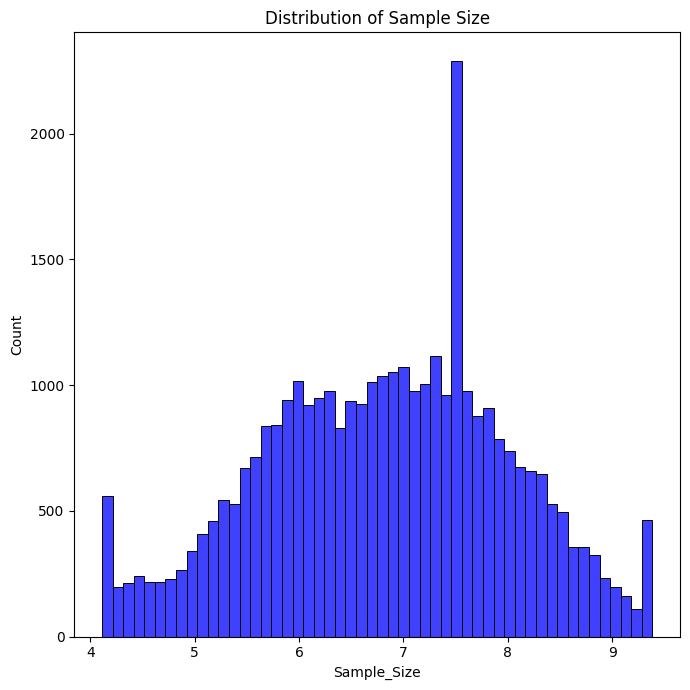

In [25]:
# Chart - 2 visualization code
#Dependent varaible "Appliance" after Skewness log mode Treatment for variable appliances 

# Create a histogram for the 'Sample_Size' column
plt.figure(figsize=(7, 7))
sns.histplot(Ctobdata['Sample_Size'], color='blue', kde=False)

# Display the plot
plt.title("Distribution of Sample Size")
plt.tight_layout()
plt.show()

*Plotting the object values in pairplot.*

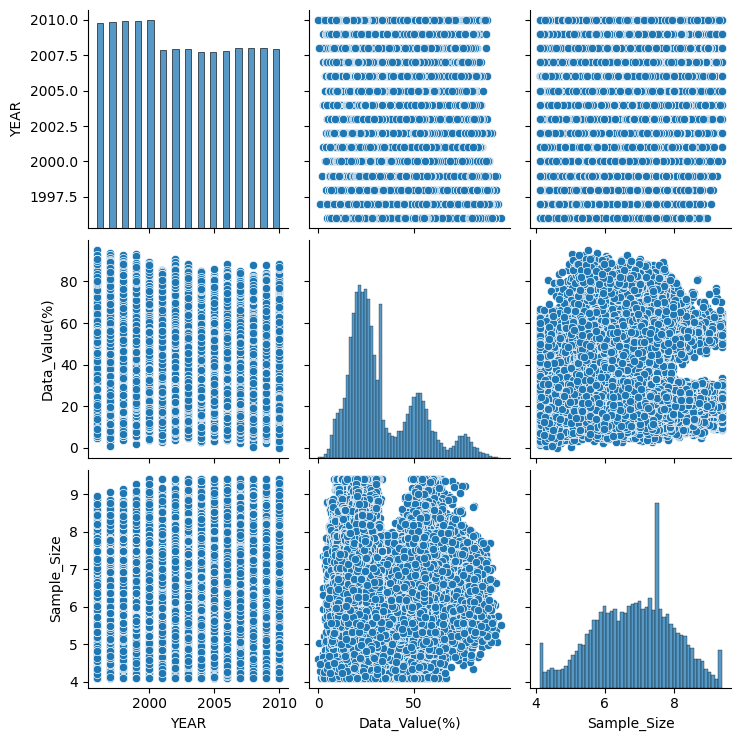

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the pairplot with numeric columns and without palette
numeric_columns = Ctobdata.select_dtypes(exclude=['object']).columns
ax = sns.pairplot(Ctobdata[numeric_columns])

# Display the plot
plt.show()

*Plotting the Bar graph to understand the target value.*

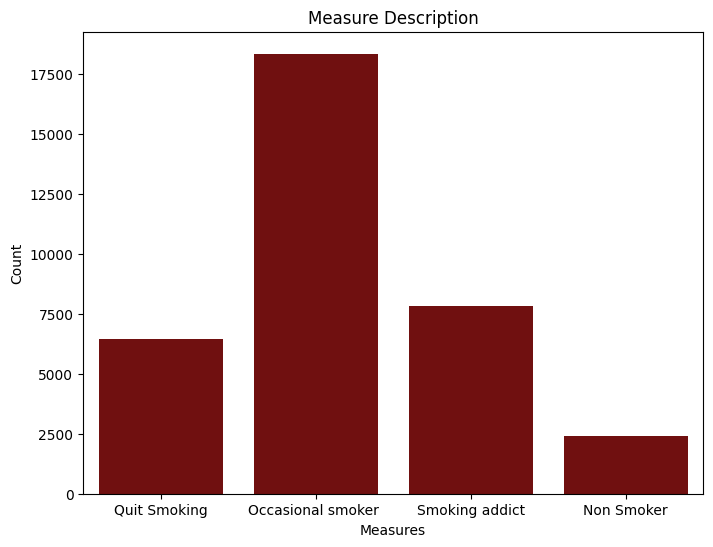

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(x="MeasureDesc",data=Ctobdata,color='maroon')
plt.title('Measure Description')
plt.xlabel('Measures')
plt.ylabel('Count')
plt.show()

*Finding and handling the outliers of the dataset*

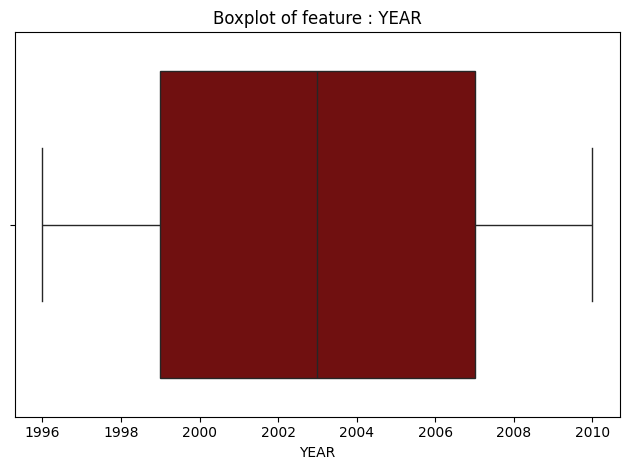

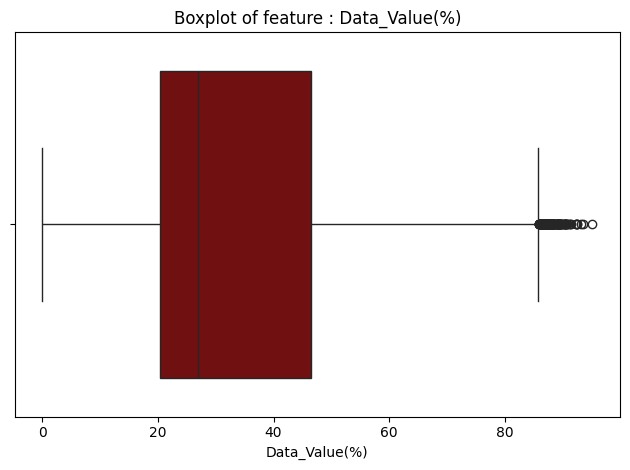

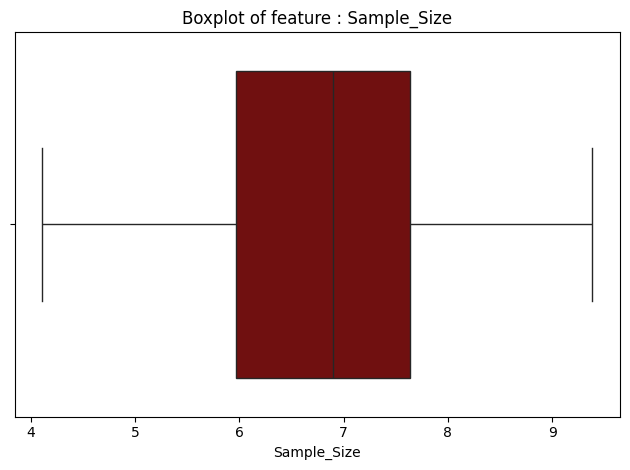

In [28]:
### Outlier detection using boxplot
for column in Ctobdata.select_dtypes(include="number").columns:
    if column == "MeasureDesc":
        continue
    sns.boxplot(data=Ctobdata, x=column,color='maroon')
    plt.title(f"Boxplot of feature : {column}")
    plt.tight_layout()
    plt.show()
    print("\n")

In [29]:
Ctobdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34997 entries, 0 to 38049
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YEAR           34997 non-null  int64  
 1   LocationAbbr   34997 non-null  object 
 2   LocationDesc   34997 non-null  object 
 3   TopicDesc      34997 non-null  object 
 4   MeasureDesc    34997 non-null  object 
 5   Data_Value(%)  34997 non-null  float64
 6   Sample_Size    34997 non-null  float64
 7   Gender         34997 non-null  object 
 8   Race           34997 non-null  object 
 9   Age            34997 non-null  object 
 10  Education      34997 non-null  object 
 11  DataSource     34997 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 3.5+ MB


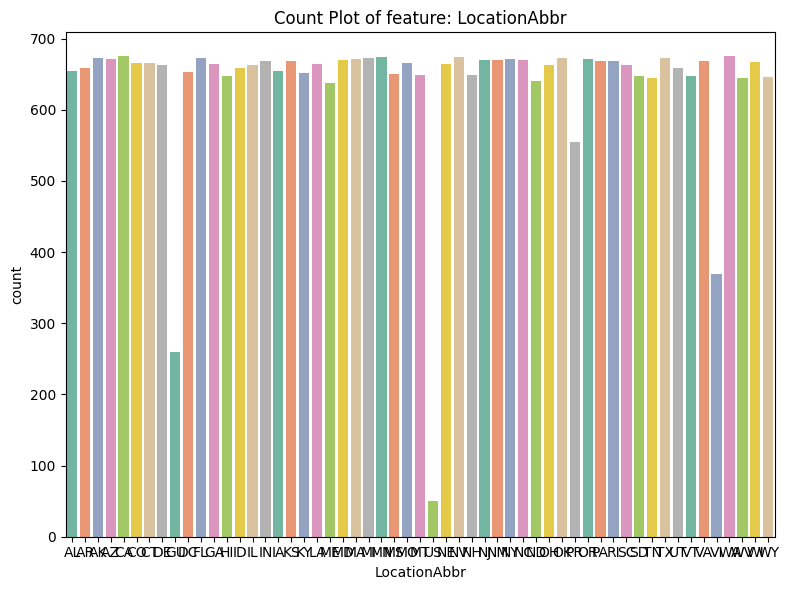

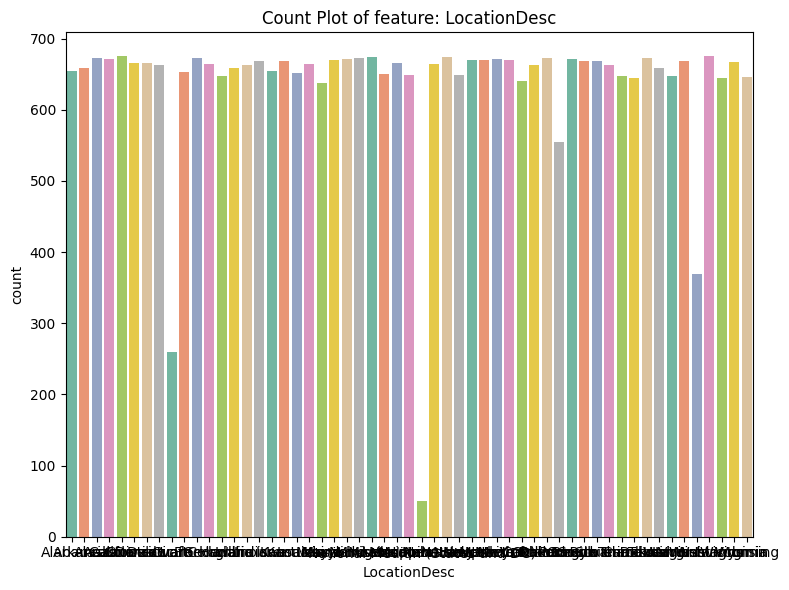

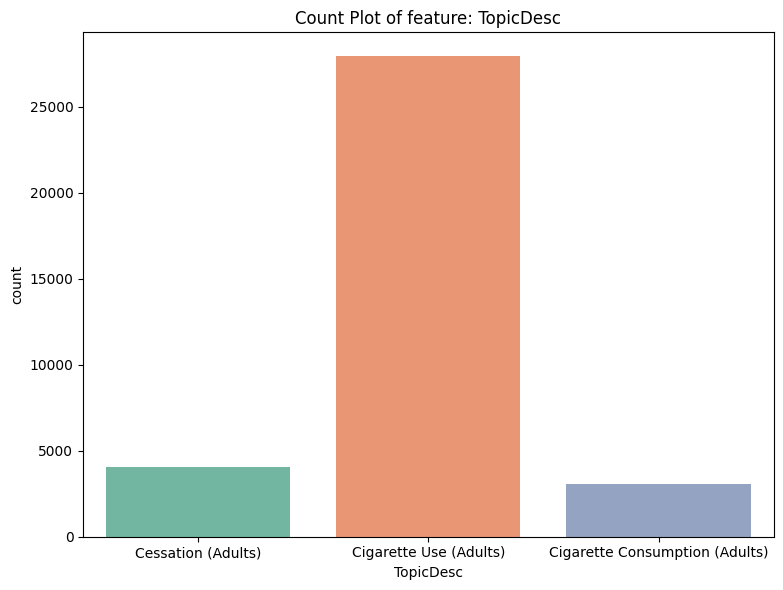

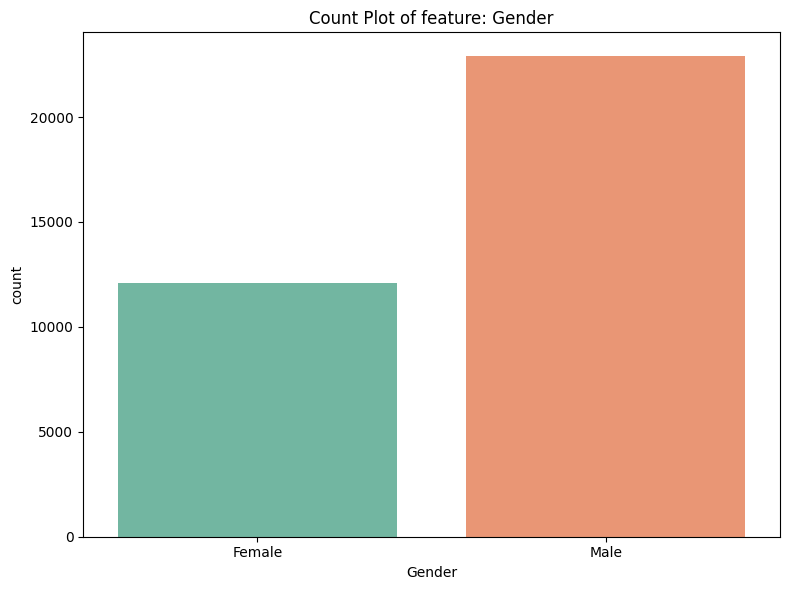

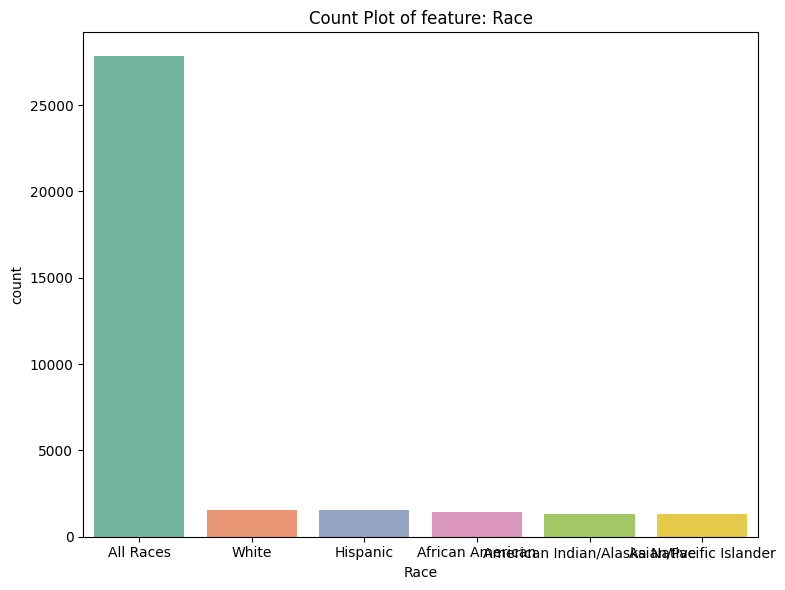

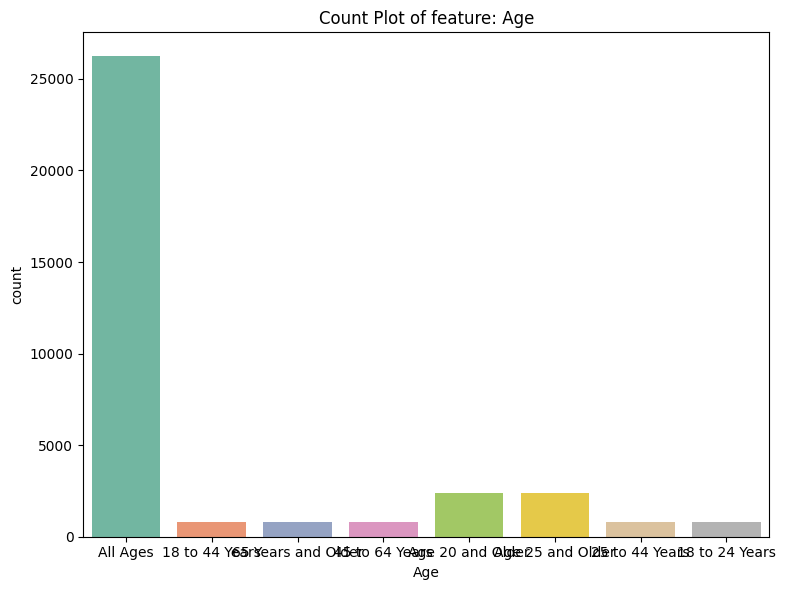

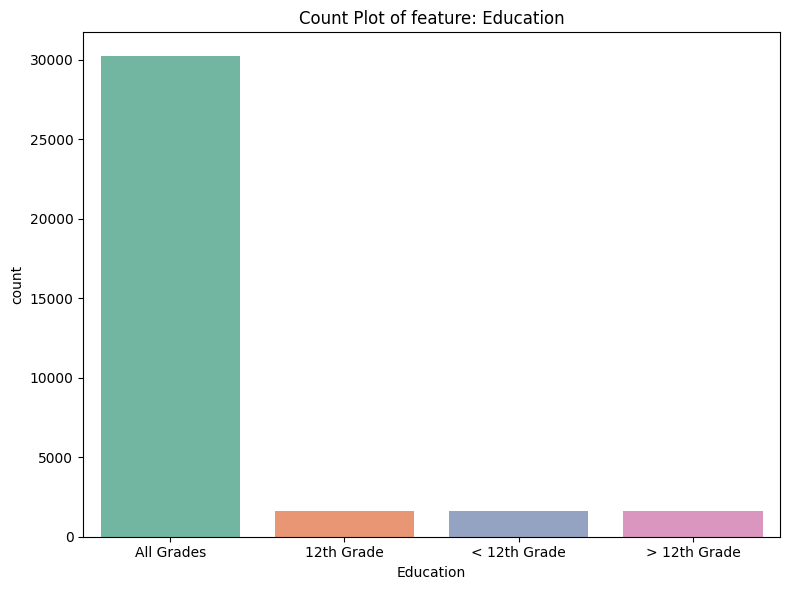

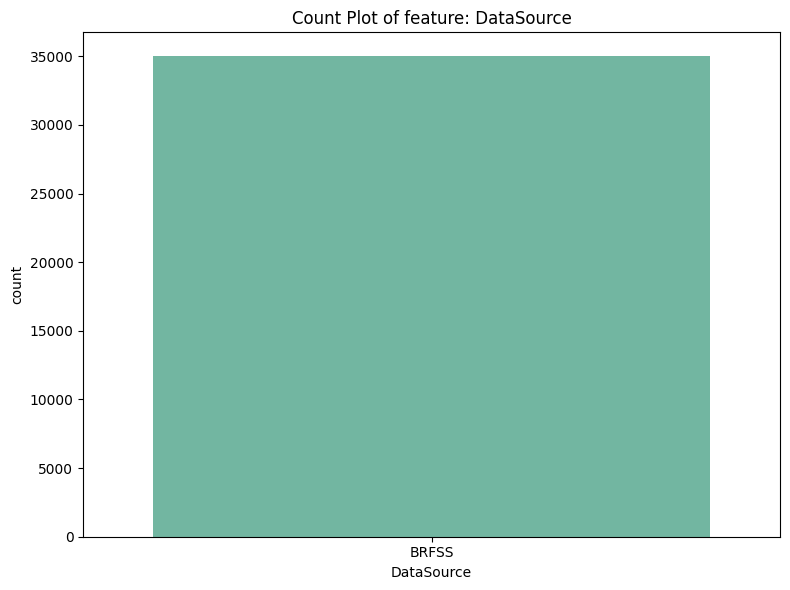

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through all columns in the DataFrame
for column in Ctobdata.columns:
    if column == "MeasureDesc":
        continue  # Skip the "MeasureDesc" column
    
    # Check if the column is categorical (object type or categorical dtype)
    if Ctobdata[column].dtype == 'object' or Ctobdata[column].dtype.name == 'category':
        # Create a count plot with the 'hue' argument assigned to 'x' to avoid the warning
        plt.figure(figsize=(8, 6))
        sns.countplot(data=Ctobdata, x=column, hue=column, palette='Set2', legend=False)

        # Add a title
        plt.title(f'Count Plot of feature: {column}')
        
        # Display the plot
        plt.tight_layout()
        plt.show()
        print("\n")

*Finding the Correlation of the Dataset*

In [31]:
correlation_matrix = Ctobdata.select_dtypes(include="number").corr()
correlation_matrix

,YEAR,Data_Value(%),Sample_Size
YEAR,1.000000,0.018261,0.272659
Data_Value(%),0.018261,1.000000,-0.063787
Sample_Size,0.272659,-0.063787,1.000000


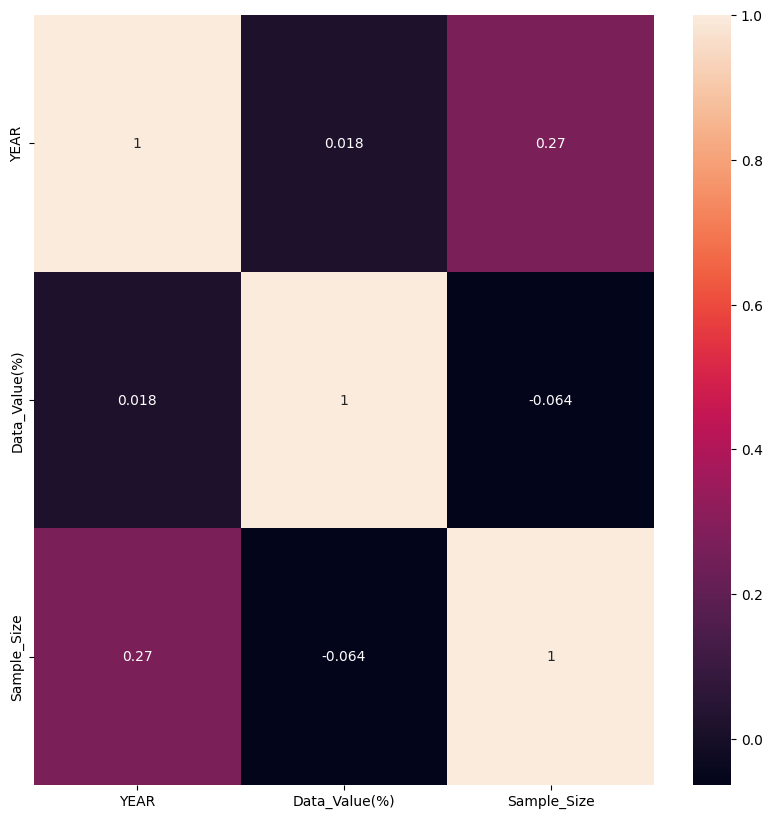

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True) # draw heatmap
plt.show()

**5 . Data Encoding**

In [33]:
###Adding all object valued columns in one variable to make it easier to navigate.
columns = ['LocationAbbr', 'LocationDesc', 'TopicDesc', 'MeasureDesc', 'Gender', 'Race', 'Age', 'Education', 'DataSource'] # define categorical columns


*Explanation: pd.get_dummies() automatically creates new columns for each unique category within a categorical variable.For each category, a binary value (0 or 1) is assigned to indicate the presence or absence of that category in the original data.*

In [34]:
encoded_tdf = pd.get_dummies(Ctobdata, columns=columns, dtype=int) # encode categorical columns
encoded_tdf


,YEAR,Data_Value(%),Sample_Size,LocationAbbr_AK,LocationAbbr_AL,LocationAbbr_AR,LocationAbbr_AZ,LocationAbbr_CA,LocationAbbr_CO,LocationAbbr_CT,...,Age_45 to 64 Years,Age_65 Years and Older,Age_Age 20 and Older,Age_Age 25 and Older,Age_All Ages,Education_12th Grade,Education_< 12th Grade,Education_> 12th Grade,Education_All Grades,DataSource_BRFSS
0,2010,53.3,6.492240,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
1,2010,18.7,8.563122,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
2,2010,18.6,7.088409,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,2010,21.5,8.584852,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
4,2010,21.8,4.653960,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38045,1996,54.0,5.337538,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
38046,1996,28.2,5.337538,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
38047,1996,20.8,6.248043,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
38048,1996,13.9,5.736572,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1


In [35]:
### Merged the target variable from the Ctobdata and encoded_tdf to df_concat.
df_concat = pd.concat([encoded_tdf, Ctobdata['MeasureDesc']], axis=1)
df_concat

,YEAR,Data_Value(%),Sample_Size,LocationAbbr_AK,LocationAbbr_AL,LocationAbbr_AR,LocationAbbr_AZ,LocationAbbr_CA,LocationAbbr_CO,LocationAbbr_CT,...,Age_65 Years and Older,Age_Age 20 and Older,Age_Age 25 and Older,Age_All Ages,Education_12th Grade,Education_< 12th Grade,Education_> 12th Grade,Education_All Grades,DataSource_BRFSS,MeasureDesc
0,2010,53.3,6.492240,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,Quit Smoking
1,2010,18.7,8.563122,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,Occasional smoker
2,2010,18.6,7.088409,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,Occasional smoker
3,2010,21.5,8.584852,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,Occasional smoker
4,2010,21.8,4.653960,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,Occasional smoker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38045,1996,54.0,5.337538,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,Smoking addict
38046,1996,28.2,5.337538,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,Smoking addict
38047,1996,20.8,6.248043,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,Smoking addict
38048,1996,13.9,5.736572,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,Smoking addict


In [36]:
###A routine check if there is null value after merging the column.
print(df_concat.isnull().sum())

YEAR                      0
Data_Value(%)             0
Sample_Size               0
LocationAbbr_AK           0
LocationAbbr_AL           0
                         ..
Education_< 12th Grade    0
Education_> 12th Grade    0
Education_All Grades      0
DataSource_BRFSS          0
MeasureDesc               0
Length: 142, dtype: int64


In [37]:
###Encoding just that target column with Label Encoder for smooth process
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_concat['MeasureDesc'] = le.fit_transform(df_concat['MeasureDesc'])
df_concat['MeasureDesc']

0        2
1        1
2        1
3        1
4        1
        ..
38045    3
38046    3
38047    3
38048    3
38049    2
Name: MeasureDesc, Length: 34997, dtype: int32

**6. Feature Matrix**

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [39]:
# Define feature matrix and target variable
X = df_concat.drop(columns=['MeasureDesc'])  # Drop the target column to get only features
y = df_concat['MeasureDesc']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train\n",X_train.shape, "\nX_test",X_test.shape, "\ny_train",y_train.shape,"\n y_test" ,y_test.shape )

X_train
 (27997, 141) 
X_test (7000, 141) 
y_train (27997,) 
 y_test (7000,)


**7. Standardised Feature**

In [40]:
# Scale the selected features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**8. Principal Component Analysis (PCA)**

In [41]:
# Apply PCA to retain 95% variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Check the number of components
print("Number of PCA components:", X_train_pca.shape[1], "," , X_test_pca.shape[1])



Number of PCA components: 67 , 67


**8. ML Modeling**

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Train each model and store predictions
predictions = {}
for model_name, model in models.items():
    model.fit(X_train_pca, y_train)  # Training on the selected features
    predictions[model_name] = model.predict(X_test_pca)  # Store predictions for later evaluation


In [43]:
###Use Regression Models
###Replace the classification models with regression models. Here are some common regression models:

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Example with regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}


In [44]:
###Evaluate Using Regression Metrics
##For regression tasks, you would evaluate models using metrics like Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R² score.
###Here’s how you could calculate these metrics for each regression model:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

results = []


for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': model_name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2 Score': r2
    })

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)
print("Evaluation Metrics for Each Model:")
print(results_df)

Evaluation Metrics for Each Model:
                      Model           MSE          RMSE           MAE  \
0         Linear Regression  2.140290e-28  1.462973e-14  1.175138e-14   
1             Decision Tree  0.000000e+00  0.000000e+00  0.000000e+00   
2             Random Forest  0.000000e+00  0.000000e+00  0.000000e+00   
3  Support Vector Regressor  8.179486e-01  9.044051e-01  6.134631e-01   

   R2 Score  
0  1.000000  
1  1.000000  
2  1.000000  
3  0.004038  


In [45]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming X and y are your feature matrix and target vector
# Replace X and y with your actual data
# Example: X = df.drop(columns='target'), y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

# Loop through models, train, predict, and display regression metrics
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate regression metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Display results
    print(f"\nMetrics for {model_name}:")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R² Score: {r2}")



Metrics for Linear Regression:
MSE: 2.1402898474808054e-28
RMSE: 1.462972948307933e-14
MAE: 1.1751377648749894e-14
R² Score: 1.0

Metrics for Decision Tree Regressor:
MSE: 0.0
RMSE: 0.0
MAE: 0.0
R² Score: 1.0

Metrics for Random Forest Regressor:
MSE: 0.0
RMSE: 0.0
MAE: 0.0
R² Score: 1.0

Metrics for Gradient Boosting Regressor:
MSE: 5.794776470302145e-10
RMSE: 2.407234195150556e-05
MAE: 2.1229006723600612e-05
R² Score: 0.9999999992944084

Metrics for Support Vector Regressor:
MSE: 0.8179485542106527
RMSE: 0.9044050830300837
MAE: 0.6134631009474383
R² Score: 0.004038191647757983


In [46]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming X (features) and y (target) are prepared
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Ridge Regression
ridge = Ridge(alpha=1.0)  # You can tune alpha for more regularization
ridge.fit(X_train, y_train)

# Predictions
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

# Evaluate on the test set
mse = mean_squared_error(y_test, y_pred_test)
rmse = root_mean_squared_error(y_test, y_pred_test)  # Correct function to compute RMSE
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f"Test Metrics for Ridge Regression:")
print(f"MSE: {mse:.6f}")
print(f"RMSE: {rmse:.6f}")
print(f"MAE: {mae:.6f}")
print(f"R2 Score: {r2:.6f}")


Test Metrics for Ridge Regression:
MSE: 0.000000
RMSE: 0.000289
MAE: 0.000206
R2 Score: 1.000000


In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

# Train Decision Tree with max_depth regularization
dt = DecisionTreeRegressor(max_depth=3, random_state=42)  # Regularized with max_depth
dt.fit(X_train, y_train)

# Predictions
y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)

# Evaluate
mse_dt = mean_squared_error(y_test, y_pred_test_dt)
rmse_dt = root_mean_squared_error(y_test, y_pred_test_dt)  # Use the new RMSE function
mae_dt = mean_absolute_error(y_test, y_pred_test_dt)
r2_dt = r2_score(y_test, y_pred_test_dt)

print(f"Test Metrics for Decision Tree:")
print(f"MSE: {mse_dt:.6f}")
print(f"RMSE: {rmse_dt:.6f}")
print(f"MAE: {mae_dt:.6f}")
print(f"R2 Score: {r2_dt:.6f}")


Test Metrics for Decision Tree:
MSE: 0.000000
RMSE: 0.000000
MAE: 0.000000
R2 Score: 1.000000


In [48]:
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting with regularization
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

# Predictions
y_pred_train_gbr = gbr.predict(X_train)
y_pred_test_gbr = gbr.predict(X_test)

# Evaluate
mse_gbr = mean_squared_error(y_test, y_pred_test_gbr)
rmse_gbr = root_mean_squared_error(y_test, y_pred_test_dt)
mae_gbr = mean_absolute_error(y_test, y_pred_test_gbr)
r2_gbr = r2_score(y_test, y_pred_test_gbr)

print(f"Test Metrics for Gradient Boosting:")
print(f"MSE: {mse_gbr:.6f}")
print(f"RMSE: {rmse_gbr:.6f}")
print(f"MAE: {mae_gbr:.6f}")
print(f"R2 Score: {r2_gbr:.6f}")

Test Metrics for Gradient Boosting:
MSE: 0.000000
RMSE: 0.000000
MAE: 0.000021
R2 Score: 1.000000


In [49]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

models = {
    'Logistic Regression': LogisticRegression(),
    'SVC': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNeighbors Classifier': KNeighborsClassifier()
}

# Define hyperparameter grids for each model
param_dists = {
    'Logistic Regression': {
        'C': np.logspace(-3, 3, 7),  # Try values from 0.001 to 1000
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
   'SVC': {
        'C': [0.1, 1, 10, 100],       # Increased the range of `C`
        'kernel': ['linear', 'rbf'],   # Added 'rbf' kernel for variety
        'gamma': ['scale', 'auto']     # Added 'auto' gamma for variety
    },

    'Decision Tree': {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    },
    'KNeighbors Classifier': {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size': [20, 30, 40]
    }
}

# Perform RandomizedSearchCV for each model
best_models = {}
for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    
    # Calculate the total number of combinations in param_dists[model_name]
    total_combinations = np.prod([len(v) for v in param_dists[model_name].values()])
    
    # Adjust n_iter to be at most the number of parameter combinations
    n_iter = min(10, total_combinations)  # Use smaller value between 10 and the total combinations
    
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dists[model_name], 
                                       n_iter=n_iter, cv=5, verbose=2, random_state=42, n_jobs=-1)  # Use all cores
    random_search.fit(X_train, y_train)
    
    best_models[model_name] = random_search.best_estimator_
    print(f"Best Hyperparameters for {model_name}: {random_search.best_params_}")
    
    # Evaluate on the test set
    test_accuracy = best_models[model_name].score(X_test, y_test)
    print(f"Test Accuracy for {model_name}: {test_accuracy:.2f}")
    
    print("-" * 50)


Tuning Logistic Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}
Test Accuracy for Logistic Regression: 1.00
--------------------------------------------------
Tuning SVC...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters for SVC: {'kernel': 'linear', 'gamma': 'scale', 'C': 0.1}
Test Accuracy for SVC: 1.00
--------------------------------------------------
Tuning Decision Tree...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters for Decision Tree: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 3, 'criterion': 'gini'}
Test Accuracy for Decision Tree: 1.00
--------------------------------------------------
Tuning KNeighbors Classifier...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters for KNeighbors Classifier: {'weights': 'distance', 'n_neighbors': 7, 'l

In [51]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)

In [53]:
clf.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10)

In [57]:
from sklearn.metrics import roc_auc_score


In [60]:
x_proba=clf.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, x_proba)  # Use the probabilities for class 1 (positive class)
print(f'Decision Tree Classifier ROC AUC: {roc_auc:.4f}')

fpr,tpr,thresholds=roc_curve(y_test,x_proba)

#Plot the ROC curve

plt.figure(figsize=(5, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Decision Tree Classifier (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree Classifier ')
plt.legend(loc='lower right')
plt.show()

ValueError: multi_class must be in ('ovo', 'ovr')